Moth overexposure dataset: (labelled "init")

Note: {'moth': 0, 'non_moth': 1}  

So true negatives are when model is right about moths, true positives are when model is right about non-moths 

In [1]:
import pandas as pd

In [8]:
limited = pd.read_csv("/work/pi_mrobson_smith_edu/mothitor/code_main/efficientnet_data/results/limited_data_more_moths_run/test.csv")

In [9]:
limited

,log_count,epoch,test_loss,tn,fp,fn,tp
0,0,0,0.900824,364.0,636.0,235.0,765.0
1,1,0,1.019888,789.0,211.0,706.0,294.0
2,2,0,0.746743,456.0,544.0,341.0,659.0
3,0,1,22.216780,399.0,601.0,387.0,613.0
4,1,1,0.708245,780.0,220.0,824.0,176.0
...,...,...,...,...,...,...,...
145,1,48,0.172496,907.0,93.0,35.0,965.0
146,2,48,0.170151,912.0,88.0,37.0,963.0
147,0,49,0.177102,889.0,111.0,30.0,970.0
148,1,49,0.162021,922.0,78.0,42.0,958.0


In [10]:
#rename columns to remove spaces
full.columns = full.columns.str.replace(' ', '')

In [11]:
full.columns

Index(['log_count', 'epoch', 'test_loss', 'tn', 'fp', 'fn', 'tp'], dtype='object')

In [12]:
#do accuracy, precision, recall
limited['accuracy'] =(limited['tp'] + limited['tn'] )/ (limited['tp'] + limited['tn'] + limited['fp'] + limited['fn'])

In [13]:
limited['precision'] = limited['tp'] / (limited['tp'] + limited['fp'])  
limited['recall'] = limited['tp'] / (limited['tp'] + limited['fn'])

In [ ]:
import matplotlib.pyplot as plt

(0.0, 1.0)

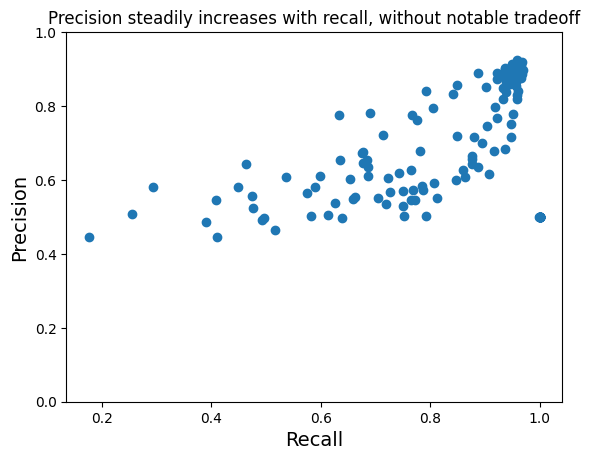

In [57]:
#plot recall on x, precision on y, as dots
plt.scatter(limited['recall'], limited['precision'], label='Precision vs Recall Dots')
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.title('Precision steadily increases with recall, without notable tradeoff')
plt.ylim(0, 1)

In [23]:
#auc roc curve now
import numpy as np

limited['tpr'] = limited['tp'] / (limited['tp'] + limited['fn'])
limited['fpr'] = limited['tn'] / (limited['fp'] + limited['tn'])

Text(0.5, 1.0, 'The model usually has a higher true positive rate than false positive rate')

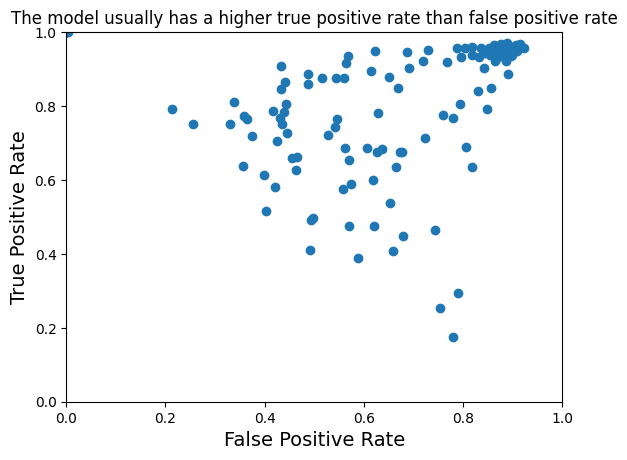

In [58]:
plt.scatter(limited['fpr'], limited['tpr'], label='ROC Curve Dots')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.title('The model usually has a higher true positive rate than false positive rate')

In [34]:
#get first row of limited
limited.iloc[0][['tpr', 'fpr', 'tp', 'fp', 'tn', 'fn']]

tpr      0.765
fpr      0.364
tp     765.000
fp     636.000
tn     364.000
fn     235.000
Name: 0, dtype: float64

Text(0.5, 1.0, 'Limited Dataset First Eval Confusion Matrix')

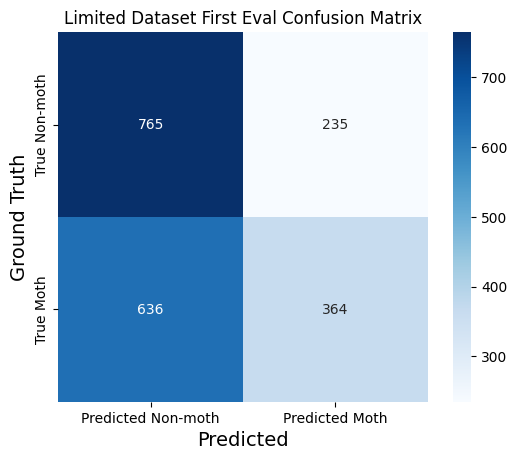

In [61]:
#starting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
matrix =[[limited.iloc[0]['tp'], limited.iloc[0]['fn']],
                     [limited.iloc[0]['fp'], limited.iloc[0]['tn']]]

ax = sns.heatmap(matrix,  annot=True,fmt='g', cmap='Blues',
                 square=True,xticklabels=['Predicted Non-moth', 'Predicted Moth'], yticklabels=['True Non-moth', 'True Moth'])
plt.xlabel('Predicted', size=14)
plt.ylabel('Ground Truth', size=14)
plt.title('Limited Dataset First Eval Confusion Matrix')

Text(0.5, 1.0, 'Limited Dataset Last Eval Confusion Matrix')

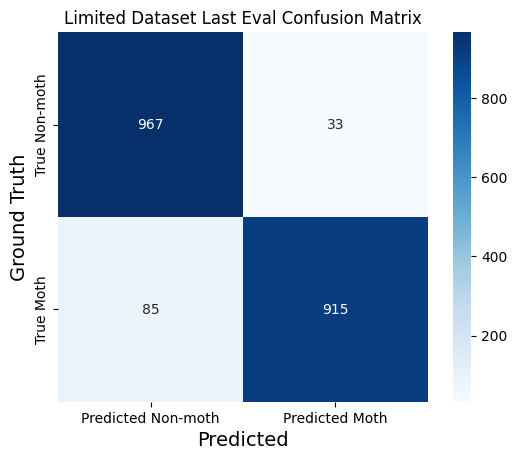

In [62]:
#now last eval
matrix =[[limited.iloc[-1]['tp'], limited.iloc[-1]['fn']],
                        [limited.iloc[-1]['fp'], limited.iloc[-1]['tn']]]

ax = sns.heatmap(matrix,  annot=True,fmt='g',cmap='Blues',
                 square=True,xticklabels=['Predicted Non-moth', 'Predicted Moth'], yticklabels=['True Non-moth', 'True Moth'])
plt.xlabel('Predicted', size=14)
plt.ylabel('Ground Truth', size=14)
plt.title('Limited Dataset Last Eval Confusion Matrix')


In [63]:
limited

,log_count,epoch,test_loss,tn,fp,fn,tp,accuracy,precision,recall,tpr,fpr
0,0,0,0.900824,364.0,636.0,235.0,765.0,0.5645,0.546039,0.765,0.765,0.364
1,1,0,1.019888,789.0,211.0,706.0,294.0,0.5415,0.582178,0.294,0.294,0.789
2,2,0,0.746743,456.0,544.0,341.0,659.0,0.5575,0.547797,0.659,0.659,0.456
3,0,1,22.216780,399.0,601.0,387.0,613.0,0.5060,0.504942,0.613,0.613,0.399
4,1,1,0.708245,780.0,220.0,824.0,176.0,0.4780,0.444444,0.176,0.176,0.780
...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,48,0.172496,907.0,93.0,35.0,965.0,0.9360,0.912098,0.965,0.965,0.907
146,2,48,0.170151,912.0,88.0,37.0,963.0,0.9375,0.916270,0.963,0.963,0.912
147,0,49,0.177102,889.0,111.0,30.0,970.0,0.9295,0.897317,0.970,0.970,0.889
148,1,49,0.162021,922.0,78.0,42.0,958.0,0.9400,0.924710,0.958,0.958,0.922


Full dataset

In [64]:
full = pd.read_csv("/work/pi_mrobson_smith_edu/mothitor/code_main/efficientnet_data/results/total_data_run/test.csv")

In [65]:
full.columns = full.columns.str.replace(' ', '')

#do accuracy, precision, recall
full['accuracy'] =(full['tp'] + full['tn'] )/ (full['tp'] + full['tn'] + full['fp'] + full['fn'])
full['precision'] = full['tp'] / (full['tp'] + full['fp'])  
full['recall'] = full['tp'] / (full['tp'] + full['fn'])
full['tpr'] = full['tp'] / (full['tp'] + full['fn'])
full['fpr'] = full['tn'] / (full['fp'] + full['tn'])



In [67]:
full

,log_count,epoch,test_loss,tn,fp,fn,tp,accuracy,precision,recall,tpr,fpr
0,0,0,1.156309,407.0,593.0,203.0,797.0,0.6020,0.573381,0.797,0.797,0.407
1,1,0,0.753836,284.0,716.0,268.0,732.0,0.5080,0.505525,0.732,0.732,0.284
2,2,0,112.835815,755.0,245.0,756.0,244.0,0.4995,0.498978,0.244,0.244,0.755
3,0,1,0.821985,194.0,806.0,235.0,765.0,0.4795,0.486951,0.765,0.765,0.194
4,1,1,0.762765,0.0,1000.0,0.0,1000.0,0.5000,0.500000,1.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,48,0.113813,938.0,62.0,16.0,984.0,0.9610,0.940727,0.984,0.984,0.938
146,2,48,0.108720,950.0,50.0,20.0,980.0,0.9650,0.951456,0.980,0.980,0.950
147,0,49,0.174742,846.0,154.0,6.0,994.0,0.9200,0.865854,0.994,0.994,0.846
148,1,49,0.112836,943.0,57.0,18.0,982.0,0.9625,0.945140,0.982,0.982,0.943


Text(0.5, 1.0, 'tpr fpr patterns are very similar to that of limited dataset')

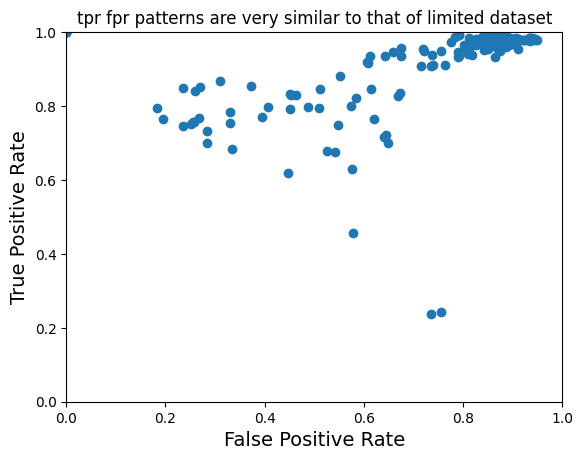

In [73]:
plt.scatter(full['fpr'], full['tpr'], label='ROC Curve Dots')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.title('tpr fpr patterns are very similar to that of limited dataset')

(0.0, 1.0)

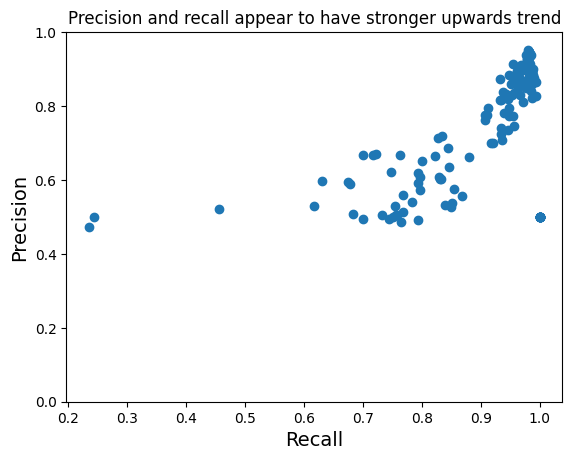

In [75]:
#plot recall on x, precision on y, as dots
plt.scatter(full['recall'], full['precision'], label='Precision vs Recall Dots')
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.title('Precision and recall appear to have stronger upwards trend')
plt.ylim(0, 1)

Text(0.5, 1.0, 'Full Dataset First Eval Confusion Matrix')

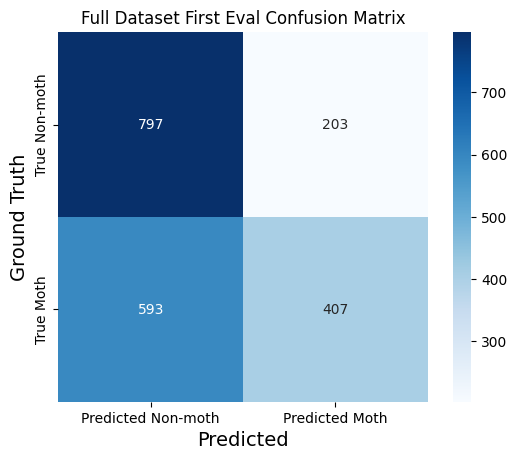

In [72]:
#starting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
matrix =[[full.iloc[0]['tp'], full.iloc[0]['fn']],
                     [full.iloc[0]['fp'], full.iloc[0]['tn']]]

ax = sns.heatmap(matrix,  annot=True,fmt='g', cmap='Blues',
                 square=True,xticklabels=['Predicted Non-moth', 'Predicted Moth'], yticklabels=['True Non-moth', 'True Moth'])
plt.xlabel('Predicted', size=14)
plt.ylabel('Ground Truth', size=14)
plt.title('Full Dataset First Eval Confusion Matrix')

Text(0.5, 1.0, 'Full Dataset Last Eval Confusion Matrix')

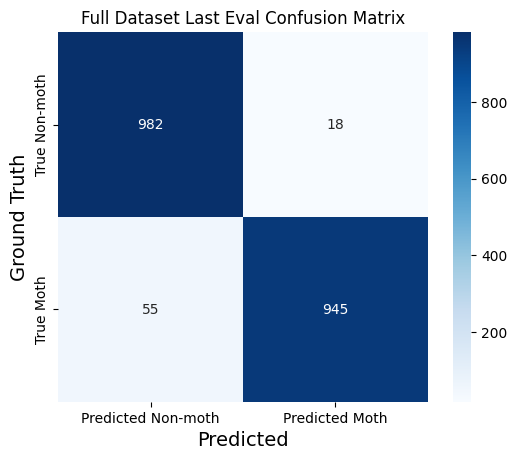

In [71]:
#now last eval
matrix =[[full.iloc[-1]['tp'], full.iloc[-1]['fn']],
                        [full.iloc[-1]['fp'], full.iloc[-1]['tn']]]

ax = sns.heatmap(matrix,  annot=True,fmt='g',cmap='Blues',
                 square=True,xticklabels=['Predicted Non-moth', 'Predicted Moth'], yticklabels=['True Non-moth', 'True Moth'])
plt.xlabel('Predicted', size=14)
plt.ylabel('Ground Truth', size=14)
plt.title('Full Dataset Last Eval Confusion Matrix')

li